In [1]:
using Plots
using LinearAlgebra
using Random
using HePPCAT
using MAT
include("../alpcahFamily.jl")
include("../helperFunctions.jl")

heppcatWrapper_known (generic function with 1 method)

In [2]:
Y = matread("original_data.mat")["dropSeq"]; # 10,000 genes by 5,000 cell samples
Y = (Y .- mean(Y, dims=2))
Random.seed!(123456)
idx = shuffle(1:5000)
Y_test = Y[:,idx[1:2500]];
Y_train = Y[:,idx[2501:end]];

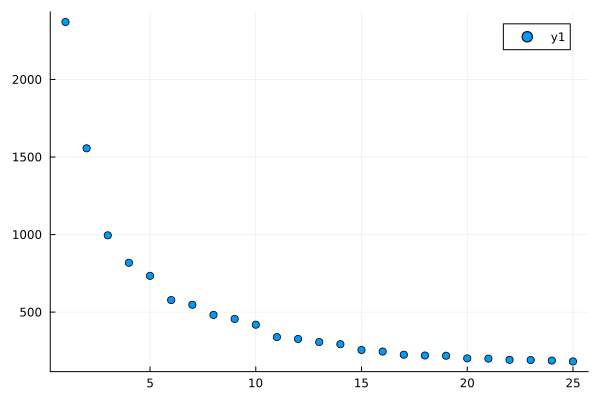

In [3]:
scatter(svdvals(Y)[1:25])

In [4]:
k = 3;

In [5]:
U_PCA = PCA(Y_train, k);

In [6]:
error_pca = norm(Y_test - U_PCA*U_PCA'*Y_test)/norm(Y_test)

0.7687318051395218

In [7]:
U_ALPCAH = LR_ALPCAH(Y_train, k, alpcahIter=3);

In [8]:
error_alpcah = norm(Y_test - U_ALPCAH*U_ALPCAH'*Y_test)/norm(Y_test)

0.6877927456636791

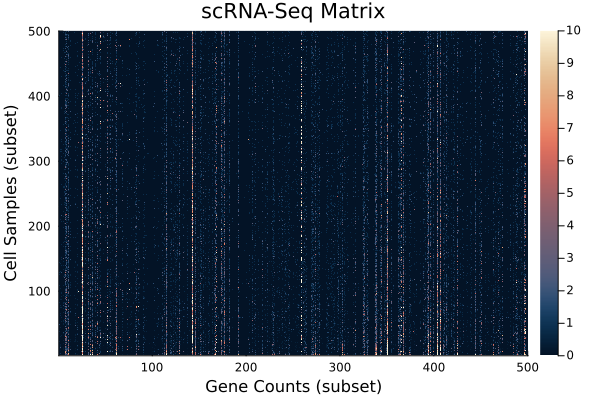

In [9]:
plot1 = heatmap(Y[1:500,1:500], clim=(0,10), cmap=:lipari, xlabel="Gene Counts (subset)", ylabel="Cell Samples (subset)", title="scRNA-Seq Matrix")

In [10]:
Y = matread("original_data.mat")["dropSeq"];k=1; # 10,000 genes by 5,000 cell samples
Y = (Y .- mean(Y, dims=2)) ./ std(Y, dims=2);
U_TOT = LR_ALPCAH(Y, k, alpcahIter = 10);
v = grouplessVarianceUpdate(Y, U_TOT*(U_TOT'*Y));

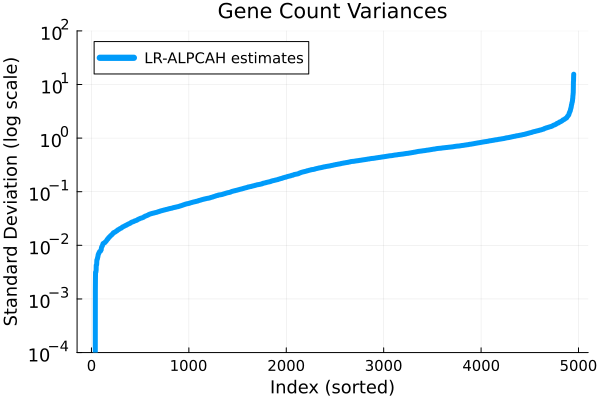

In [11]:
plot2 = plot(sort(v.^0.5)[50:end], label=" LR-ALPCAH estimates", legend=:topleft,  yaxis=:log, ylim=(1e-4,1e2), linewidth=5, xlabel="Index (sorted)", ylabel="Standard Deviation (log scale)", 
    legendfontpointsize=10,xtickfontsize=10,ytickfontsize=12,guidefontsize=12, title="Gene Count Variances")

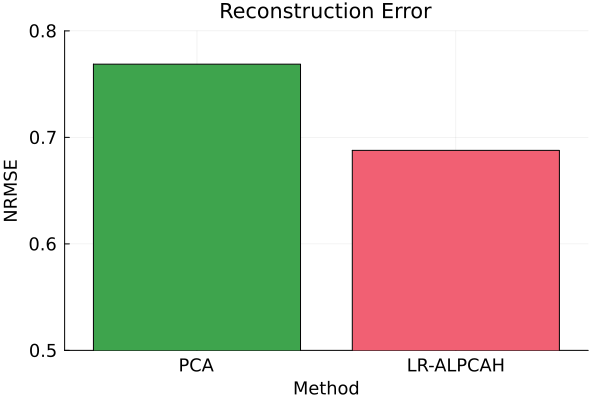

In [12]:
using LaTeXStrings
color = palette(:default)
plot3 = bar(["PCA", "LR-ALPCAH"], [error_pca, error_alpcah], color=[color[3], color[end-2]],label="", ylim=(0.5,0.8),
    legendfontpointsize=12,xtickfontsize=12,ytickfontsize=12,guidefontsize=12, 
    ylabel="NRMSE", xlabel="Method", title="Reconstruction Error")

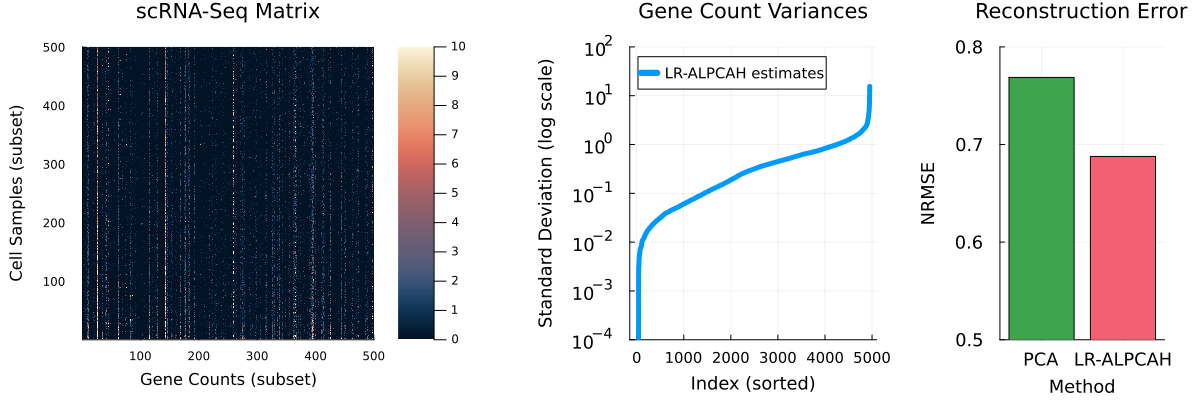

In [15]:
using Measures
layout = @layout [a{0.5w} b{0.3w} c{0.2w}]
plot(plot1, plot2,plot3, layout=layout, size=(1200, 400), bottom_margin=7mm, left_margin=7mm, right_margin=7mm, top_margin=7mm)
#savefig("combined_nrmse.pdf")